<center>
<img src="logo.png" height="900"> 
</center>


# Контрольная работа :)

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use('ggplot') # стиль для графиков
%matplotlib inline

В файле `cr.csv` лежат результаты контрольной работы, которая проводилась в Вышке на факультете "Э".  По мнению студентов эти оценки смещённые, несостоятельные и ужасно неэффективные. Но это уже совершенно другая история. Подгрузим файлик и посмотрим на него!  

In [140]:
df = pd.read_csv('cr.csv', sep='\t')
print(df.shape)
df.head()

(389, 20)


,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


In [3]:
df.k1.isna().sum()

np.int64(0)

__Описание колонок:__


* `contest_login` - уникальный идентификатор студента
* `fraud` - в списывании скольки задач был уличён студент 
* `k1` - результат за первую контрольную, `k1a - k1f` в разбивке по задачам
* `k2` - результат за вторую контрольную, `k2a - k2f` в разбивке по задачам
* `k3` - результат за третью контрольную, `k3a - k3с` в разбивке по задачам

__а) Распределение результатов контрольной__ 

- Запишите все оценки за первую контрольную в переменную `x`, все пропуски удалите
- Найдите среднее и стандартное отклонение (используйте несмещённую оценку) 
- Постройте гистограмму результатов за первую контрольную 
- На этой же картинке постройте плотность нормального распределения со средним и стандартным отклонением, посчитанными выше

Похоже ли эмпирическое распределение на нормальное? 

5.4478149100257065 10.007037738849283


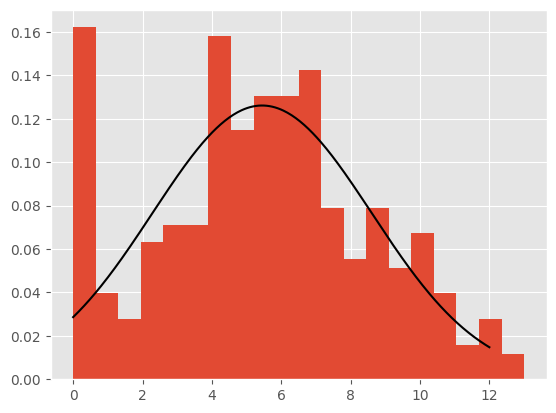

In [4]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

x = df['k1']

x_mean = x.mean()
x_var = x.var(ddof=1)
x_std = x.std(ddof=1)
print(x_mean, x_var)

x.hist(bins=20,density=True)
# your code here
xs = np.linspace(0, 12, 300)
ys = stats.norm(loc=x_mean, scale=x_std).pdf(xs)
plt.plot(xs, ys, color="black");

In [5]:
# проверка, что среднее и стандартное откланение посчитаны корректно
assert np.abs(x_mean - 5.4478149100) < 1e-5

# похожие тесты на другие части задания скрыты от вас


По аналогии с тем, как это было сделано на лекции, проверьте с помощью теста Колмогорова-Смирнова гипотезу о нормальности: 

- Используйте функцию `kstest` из пакета `scipy`
- С помощью `.pvalue` вытащите из результатов теста p-значение, запишите его в переменную `pvalue`
- По аналогии запишите в `K` значение статистики Колмогорова
- Если p-значение оказалось больше $0.05$, гипотеза о нормальности данных не отвергается, и мы можем дальше использовать эту предпосылку

In [6]:
stats.kstest(x, 'norm', args=(x_mean, x_std))

KstestResult(statistic=np.float64(0.05124747789637904), pvalue=np.float64(0.2500068105451755), statistic_location=np.float64(1.0), statistic_sign=np.int8(1))

In [7]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

pvalue = stats.kstest(x, 'norm', args=(x_mean, x_std)).pvalue
K =  stats.kstest(x, 'norm', args=(x_mean, x_std)).statistic

# your code here


In [8]:
# проверка, что pvalue найдено корректно
assert np.abs(K - 0.051247) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Предположим невероятное! А именно, независимость и одинаковую распределённость наших наблюдений (никто не списывал контрольную друг у друга).

__б) Интервал для среднего.__ 

Постройте точный $95\%$-й доверительный интервал для ожидамоего результата за первую контрольную. В качестве оценки стандартного отклонения используйте несмещённый вариант, `ddof=1`. В переменные `left` и `right` запишите границы получившегося интервала. В переменную `delta` его ширину. 

In [9]:
x.std()

np.float64(3.163390228670703)

In [10]:
x.var()

np.float64(10.007037738849283)

In [11]:
x.var(ddof = 1)

np.float64(10.007037738849283)

In [12]:
x.std(ddof = 1)

np.float64(3.163390228670703)

In [13]:
x_var = x.var(ddof = 1)

In [14]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
norm_rv = stats.norm()

alpha = 0.05
z_crit = norm_rv.ppf(1 - alpha/2)
n = len(x) 

left = x_mean - z_crit * np.sqrt(x_var/n)
right = x_mean + z_crit * np.sqrt(x_var/n)
delta = 2 * z_crit * np.sqrt(x_var/n)

print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, delta))
z_crit

Доверительный интервал [5.133; 5.762] ширины 0.6287


np.float64(1.959963984540054)

In [15]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 5.13247213744281) < 1e-5

# похожие тесты на другие части задания скрыты от вас


AssertionError: 

__в) Ангелы и демоны__

Переменная`fraud` - в списывании скольки задач был уличён студент. Разобьём наши наблюдения на две группы: Ангелы и Демоны. У Ангелов `fraud == 0`, у Демонов `fraud > 0`. 

Запишите оценки за первую контрольную для ангелов в переменную `angels`, для демонов в `demons`. Все пропуски из выборки удалите. Постройте на общем фоне гистограмму распределения оценок за первую контрольную у Ангелов и Демонов. 

In [16]:
df.fraud.isnull().sum()

np.int64(30)

In [147]:
df = df.drop(df[df.fraud.isnull()].index)
df.head()

,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


(array([0.03384615, 0.05538462, 0.08923077, 0.14461538, 0.13230769,
        0.13538462, 0.07692308, 0.04307692, 0.03384615, 0.02461538]),
 array([ 0. ,  1.3,  2.6,  3.9,  5.2,  6.5,  7.8,  9.1, 10.4, 11.7, 13. ]),
 <BarContainer object of 10 artists>)

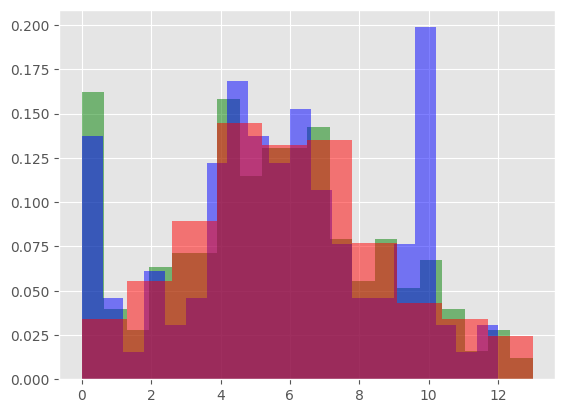

In [18]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

angels = df[df.fraud == 0].k1.values
demons = df[df.fraud > 0].k1.values

x.hist(bins=20, density=True, alpha=0.5, color = 'green')
plt.hist(angels, color = 'blue', bins=20, density=True, alpha=0.5)
plt.hist(demons, color = 'red',  density=True, alpha=0.5)
# your code here


In [ ]:
# проверка того, сколько в выборке оказалось ангелов и демонов
assert len(angels) == 109

# похожие тесты на другие части задания скрыты от вас


__г) Интервал для разницы средних__ 

Постройте примерный $95\%$-й доверительный интервал для разницы ожидаемого результата за первую контрольную у Ангелов и Демонов без предположения о равенстве дисперсий (интервал Уэлча). Для оценки всех дисперсий используйте несмещённый вариант. Заполните все переменные, перечисленные ниже. 

In [19]:
angels.size

109

In [20]:
angels.var(ddof = 1)

np.float64(9.328462453278966)

In [21]:
angels.var()

np.float64(9.242880228936958)

In [22]:
angels.var(ddof = 0)

np.float64(9.242880228936958)

In [23]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
diff = angels.mean() - demons.mean()
n_angels, n_demons = angels.size, demons.size
diff_sd = np.sqrt(angels.var(ddof = 1)/n_angels + demons.var(ddof = 1)/n_demons)

u = (angels.var(ddof = 1) / n_angels + demons.var(ddof = 1) / n_demons) ** 2
d = (angels.var(ddof = 1)**2) / (n_angels**2 * (n_angels - 1)) + (demons.var(ddof = 1)**2)/ (n_demons**2* (n_demons - 1))
nu =  u/d 
print("Число степеней свободы:", nu) # число степеней свободы в распределении Стьюдента

left, right = stats.t.interval(0.95, df=nu, loc=diff, scale=diff_sd)
print("Доверительный интервал [{:.4}; {:.4}] ширины {:.4}".format(left, right, right - left))
# your code here


Число степеней свободы: 191.68606564215975
Доверительный интервал [-0.8046; 0.547] ширины 1.352


In [24]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.8045581262764373) < 1e-5

# похожие тесты на другие части задания скрыты от вас


Входит ли в получившийся доверительный интервал ноль? Как думаете, что это означает? 

__д) Интервал для дисперсии__ 

Предположим, что математическое ожидание результата за контрольную зависит от уровня подготовки, а дисперсия результата — от нервов. Постройте для отношения нервозности Демонов и Ангелов $95\%$ доверительный интервал. Для оценки всех дисперсий используйте несмещённый вариант. 

In [25]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you
alpha = 0.05

n, m = n_angels - 1, n_demons - 1
sn, sm = angels.var(ddof=1), demons.var(ddof=1)

left = sm / sn * stats.f(n, m).ppf(alpha/2)
right = sm / sn * stats.f(n, m).ppf(1 - alpha/2)

print("Доверительный интервал [{:.5}; {:.5}] ширины {:.5}".format(left, right, right - left))

# your code here


Доверительный интервал [0.61204; 1.1624] ширины 0.55034


In [26]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left - 0.6120428247687726) < 1e-5

# похожие тесты на другие части задания скрыты от вас


TypeError: unsupported operand type(s) for -: 'ellipsis' and 'float'

Вошла ли в доверительный интервал единица? Как думаете, что это означает? 

__е) Ангелы и демоны решают задачки__ 

Нарисуйте картинку для корреляционной матрицы по задачам первой контрольной для всех наблюдений, отдельно для Ангелов и Демонов. Пропуски заполните нулями. Будем считать, что если у студента нет оценки, он не выполнял это задание. Для подсчёта корреляций используйте метод `.corr`. Для отрисовки матриц функцию `heatmap` из пакета `seaborn`. Для ангелов неплохо подойдёт цветовая схема `YlGnBu`. Для демонов подходит схема `gist_heat_r`.

In [27]:
df.head()

,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,NaN,16.0,12.0,6.7,NaN,5.0,NaN,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,NaN,20.0,30.0,8.2,20.0,5.0,NaN,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,NaN,16.0,14.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,NaN,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


In [28]:
df = df.fillna(0.0)

In [29]:
df_angels_corr = df[df.fraud == 0].loc[:, 'k1a' : 'k1f']
df_angels_corr.corr()

,k1a,k1b,k1c,k1d,k1e,k1f
k1a,1.000000,0.291446,0.218638,0.108194,0.158927,0.317325
k1b,0.291446,1.000000,0.487022,0.225498,0.272804,0.410323
k1c,0.218638,0.487022,1.000000,0.243571,0.411150,0.442687
k1d,0.108194,0.225498,0.243571,1.000000,0.198686,0.264577
k1e,0.158927,0.272804,0.411150,0.198686,1.000000,0.336181
k1f,0.317325,0.410323,0.442687,0.264577,0.336181,1.000000


<Axes: >

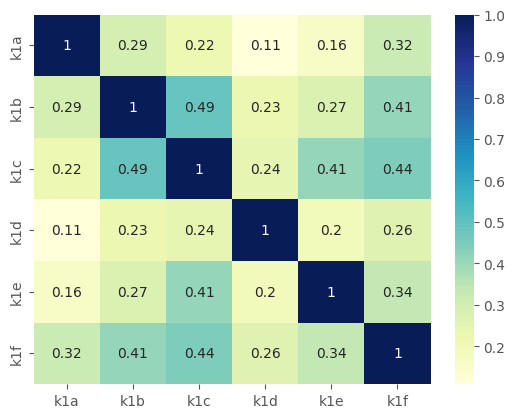

In [30]:
sns.heatmap(df_angels_corr.corr(), cmap="YlGnBu", annot=True)

In [31]:
df_demons_corr = df[df.fraud > 0].loc[:, 'k1a' : 'k1f']
df_demons_corr.corr()

,k1a,k1b,k1c,k1d,k1e,k1f
k1a,1.000000,0.174108,0.196000,0.015386,0.052574,0.022196
k1b,0.174108,1.000000,0.129282,-0.030555,0.086067,0.184785
k1c,0.196000,0.129282,1.000000,0.158235,0.366884,0.224341
k1d,0.015386,-0.030555,0.158235,1.000000,0.207241,0.251922
k1e,0.052574,0.086067,0.366884,0.207241,1.000000,0.386557
k1f,0.022196,0.184785,0.224341,0.251922,0.386557,1.000000


<Axes: >

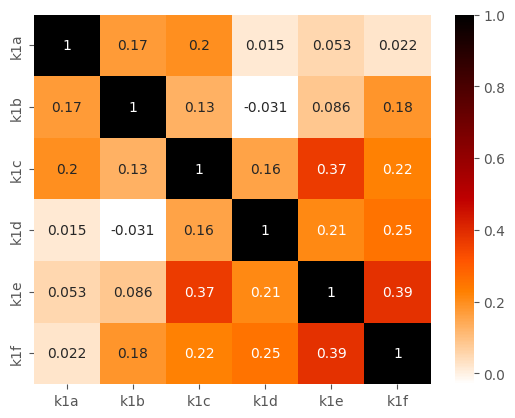

In [32]:
sns.heatmap(df_demons_corr.corr(), cmap="gist_heat_r", annot=True)

Между баллом за какие задачи самая высокая корреляция у Ангелов? В грейдер отправьте название колонок в порядке возрастания через запятую. __Например:__ `("k1a", "k1f")`. 

In [33]:
df_demons_corr.corr().max()

k1a    1.0
k1b    1.0
k1c    1.0
k1d    1.0
k1e    1.0
k1f    1.0
dtype: float64

In [34]:
### ╰( ͡° ͜ʖ ͡° )つ▬▬ι═══════  bzzzzzzzzzz
# will the code be with you

names_angels = ("k1b", "k1c")
names_demons = ("k1e", "k1f") 

# your code here


In [35]:
# проверка вашего ответа скрыта от вас

Как думаете, какие задачи было тяжелее всего списать? 

__ё) Доля написавших третью контрольную.__

Без буквы `ё` никуда, скажут нам [Пафнутий Чебышёв](https://ru.wikipedia.org/wiki/%D0%A7%D0%B5%D0%B1%D1%8B%D1%88%D1%91%D0%B2,_%D0%9F%D0%B0%D1%84%D0%BD%D1%83%D1%82%D0%B8%D0%B9_%D0%9B%D1%8C%D0%B2%D0%BE%D0%B2%D0%B8%D1%87) и [Лёв Толстой](https://arzamas.academy/special/ruslit/writers/tolstoy).  

У студентов был выбор: писать или не писать третью контрольную. Если в колонке `k3` стоит $0$, значит студент не стал это делать. Постройте асимптотический $95\%$-й доверительный интервал для разницы долей Ангелов и Демонов, которые решили писать третью контрольную. 

__Примечание:__ На практике, если мы пользуемся асимптотическими доверительными интервалами, мы можем искать границы двумя способами:

* __Первый__ состоит в том, что мы оцениваем стандартное отклонение с помощью $\sqrt{\hat{p} \cdot (1 - \hat{p})} = \sqrt{\frac{1}{n} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 
* __Второй способ__ состоит в том, чтобы оценить стандартное отклонение как  $\sqrt{\frac{1}{n-1} \cdot \sum_{i=1}^n (x_i - \bar{x})^2}$. 

В плане асимптотики это не влияет на выводы, так как обе этих оценки состоятельно оценивают дисперсию. Можно пользоваться любым. Однако, чтобы с грейдером не было проблем и задание зачлось, воспользуйтесь первым способом. 

In [37]:
df.head()

,contest_login,fraud,k1a,k1b,k1c,k1d,k1e,k1f,k1,k2a,k2b,k2c,k2d,k2e,k2f,k2,k3a,k3b,k3c,k3
0,eds_python_2020_1,0.0,10.0,10.0,20.0,30.0,4.0,22.0,10.1,20.0,10.0,20.0,20.0,20.0,20.0,11.0,35.0,0.0,27.0,6.2
1,eds_python_2020_2,1.0,9.0,10.0,20.0,0.0,16.0,12.0,6.7,0.0,5.0,0.0,20.0,20.0,20.0,6.5,35.0,29.0,22.0,8.6
2,eds_python_2020_3,0.0,2.0,10.0,20.0,0.0,20.0,30.0,8.2,20.0,5.0,0.0,20.0,20.0,20.0,8.5,28.0,2.0,0.0,3.0
3,eds_python_2020_4,1.0,10.0,10.0,20.0,0.0,16.0,14.0,7.0,20.0,10.0,0.0,20.0,20.0,20.0,9.0,30.0,38.0,0.0,6.8
4,eds_python_2020_5,2.0,10.0,10.0,12.0,0.0,16.0,22.0,7.0,20.0,10.0,0.0,20.0,20.0,20.0,9.0,0.0,0.0,0.0,0.0


In [90]:
dfyo = df[['fraud', 'k3']]
dfyo.head()

,fraud,k3
0,0.0,6.2
1,1.0,8.6
2,0.0,3.0
3,1.0,6.8
4,2.0,0.0


In [91]:
dfyo['is_k3'] = dfyo['k3'].apply(lambda x: 0 if x == 0 else 1)
dfyo.head()

C:\Users\qazws\AppData\Local\Temp\ipykernel_23420\3777796263.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfyo['is_k3'] = dfyo['k3'].apply(lambda x: 0 if x == 0 else 1)


,fraud,k3,is_k3
0,0.0,6.2,1
1,1.0,8.6,1
2,0.0,3.0,1
3,1.0,6.8,1
4,2.0,0.0,0


In [93]:
angels_13 = dfyo[dfyo.fraud == 0].is_k3.values
demons_13 = dfyo[dfyo.fraud > 0].is_k3.values
demons_13

array([1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 1, 1])

In [105]:
def confidence_interval_proportion_diff(sample1, sample2, confidence=0.95):
    # Вычисляем доли единиц (успехов) для обеих выборок
    p1 = np.mean(angels_13)
    p2 = np.mean(demons_13)
    
    # Объемы выборок
    n1 = len(angels_13)
    n2 = len(demons_13)
    
    # Разность долей
    diff = p1 - p2
    
    # Стандартная ошибка разности долей
    se_diff = np.sqrt((p1 * (1 - p1) / n1) + (p2 * (1 - p2) / n2))
    
    # Определяем критическое значение для указанного уровня доверия
    z_score = stats.norm.ppf(1 - (1 - confidence) / 2)
    
    # Нижняя и верхняя границы доверительного интервала
    left = diff - z_score * se_diff
    right = diff + z_score * se_diff
    
    return left, right


ci_lower, ci_upper = confidence_interval_proportion_diff(angels_13, demons_13)
print(f"95%-й доверительный интервал для разности долей: ({ci_lower:.4f}, {ci_upper:.4f})")


95%-й доверительный интервал для разности долей: (-0.1885, 0.0334)


In [106]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 0.1885) < 1e-3

# похожие тесты на другие части задания скрыты от вас


TypeError: unsupported operand type(s) for +: 'ellipsis' and 'float'

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

__ж) Снова разница средних__ 

Посмотрим на результаты студентов в динамике. Постройте точный $95\%$ доверительный интервал для средней разницы оценок за вторую и первую контрольные. Пропуски в данных заполните нулями. 

In [165]:
dfzh = df[['k1', 'k2']]
dfzh['k12mean'] = dfzh['k1'] - dfzh['k2']
dfzh.head()

C:\Users\qazws\AppData\Local\Temp\ipykernel_23420\571212332.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfzh['k12mean'] = dfzh['k1'] - dfzh['k2']


,k1,k2,k12mean
0,10.1,11.0,-0.9
1,6.7,6.5,0.2
2,8.2,8.5,-0.3
3,7.0,9.0,-2.0
4,7.0,9.0,-2.0


In [185]:
dfzh.head()

,k1,k2,k12mean
0,10.1,11.0,-0.9
1,6.7,6.5,0.2
2,8.2,8.5,-0.3
3,7.0,9.0,-2.0
4,7.0,9.0,-2.0


In [190]:
mean_diff = dfzh['k12mean'].mean()
n = len(dfzh)
s_squared = (1 / (n - 1)) * np.sum((dfzh['k12mean'] - mean_diff) ** 2)
se_diff = np.sqrt(s_squared / n)

# Доверительный интервал
left, right = stats.t.interval(0.95, df=n-1, loc=mean_diff, scale=se_diff)

print(f"Доверительный интервал: [{left:.4f}; {right:.4f}]")


Доверительный интервал: [-1.6199; -0.8314]


In [180]:
# проверка, что границы доверительного интервала найдены верно
assert np.abs(left + 1.4562881732820103) < 1e-5

# похожие тесты на другие части задания скрыты от вас


AssertionError: 

Входит ли в доверительный интервал ноль? Как думаете, что это означает? 

Это домашка подошла к концу. Поздравляю! Теперь вы умеете строить точные доверительные интервалы для нормальных выборок.